In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [242]:
df = pd.read_csv('loan_train.csv')
df2 = pd.read_csv('loan_test.csv')

In [243]:
df.head(21
       )

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [304]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [302]:
df['Credit_History'].nunique()

2

In [244]:
df.shape

(614, 13)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [246]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [247]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# DATA HANDLING

In [248]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [249]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [250]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [251]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [252]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [253]:
df2['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df2['Married'].fillna(df['Married'].mode()[0],inplace=True)
df2['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df2['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df2['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df2['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df2['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [254]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# DATA VISUALIZATION

Text(0.5, 1.0, 'Loan_Status')

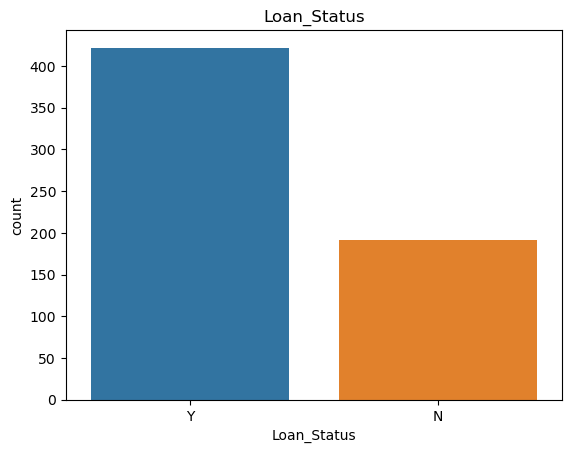

In [255]:
sns.countplot(x='Loan_Status',data=df)
plt.title("Loan_Status")

Text(0.5, 1.0, 'Gender')

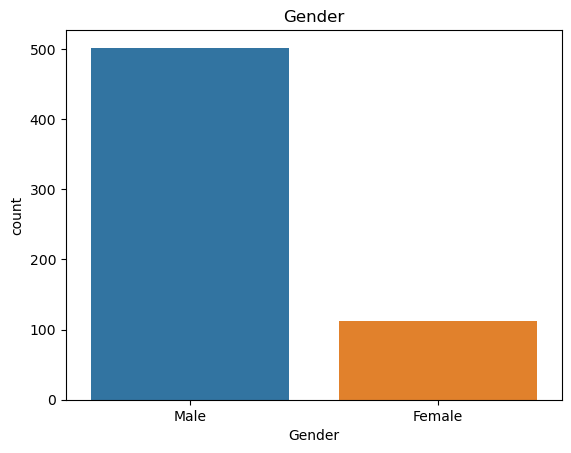

In [256]:
sns.countplot(x='Gender',data=df)
plt.title("Gender")

Text(0.5, 1.0, 'Married')

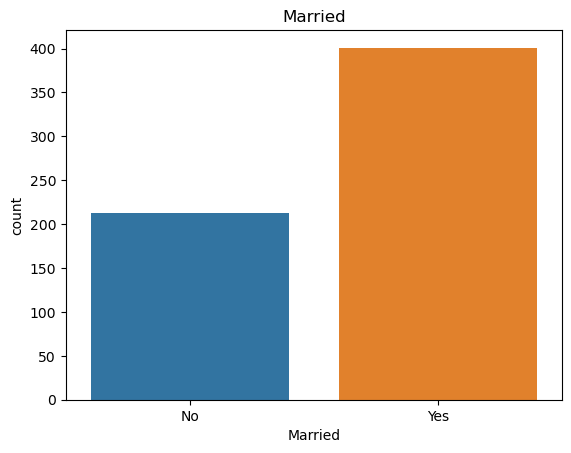

In [257]:
sns.countplot(x='Married',data=df)
plt.title("Married")

Text(0.5, 1.0, 'Self_Employed')

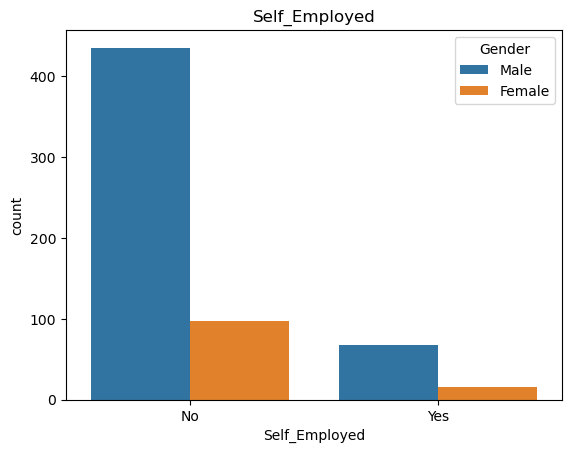

In [258]:
sns.countplot(x='Self_Employed',hue='Gender',data=df)
plt.title("Self_Employed")

Text(0.5, 1.0, 'Credit_History')

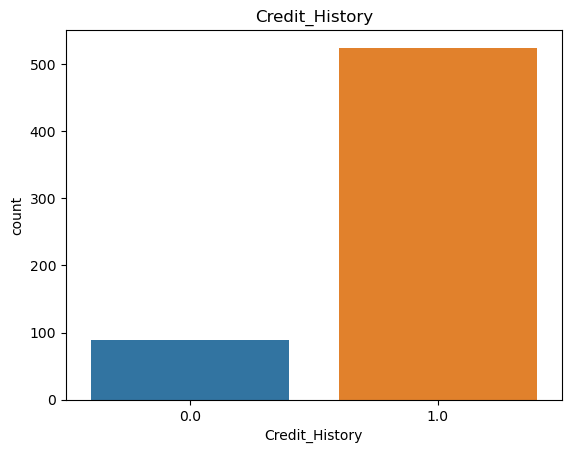

In [259]:
sns.countplot(x='Credit_History',data=df)
plt.title("Credit_History")

Text(0.5, 1.0, 'Dependents')

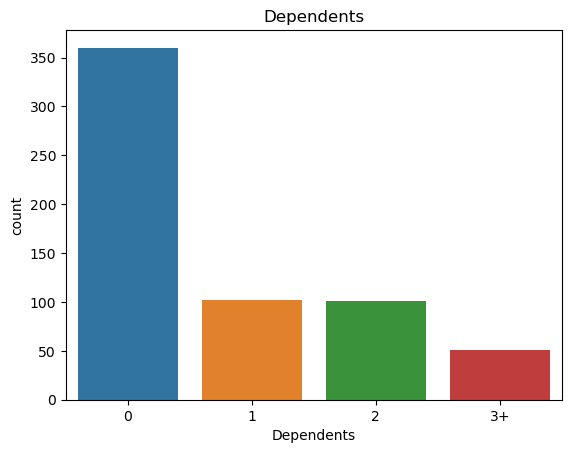

In [260]:
sns.countplot(x='Dependents',data=df)
plt.title("Dependents")

Text(0.5, 1.0, 'Education')

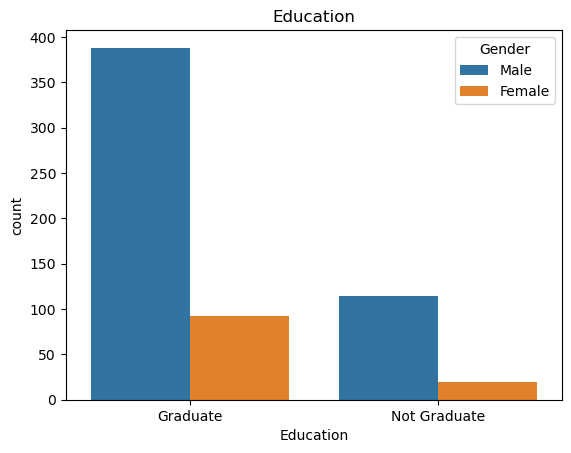

In [261]:
sns.countplot(x='Education',hue='Gender',data=df)
plt.title("Education")

Text(0.5, 1.0, 'Education')

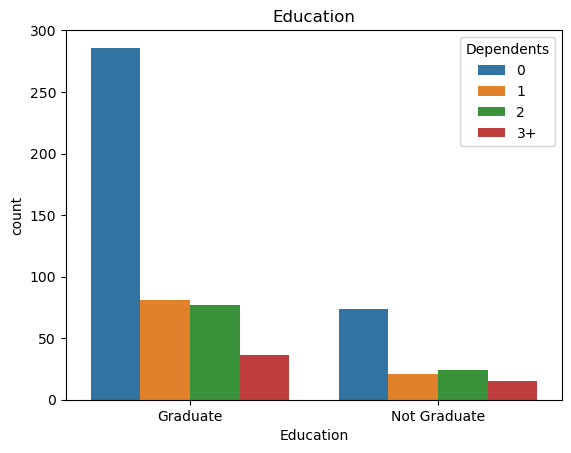

In [262]:
sns.countplot(x='Education',hue='Dependents',data=df)
plt.title("Education")

Text(0.5, 1.0, 'Property_Area')

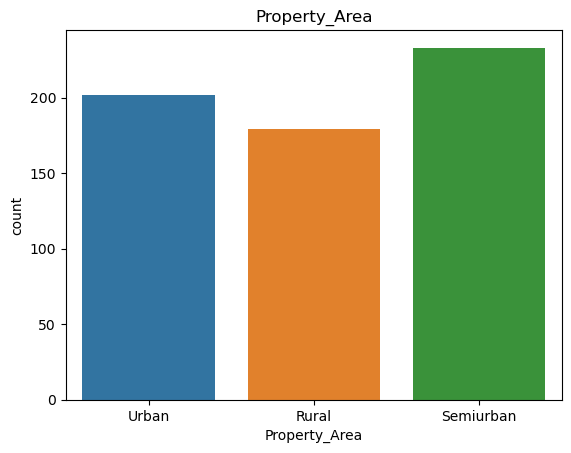

In [263]:
sns.countplot(x='Property_Area',data=df)
plt.title("Property_Area")

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

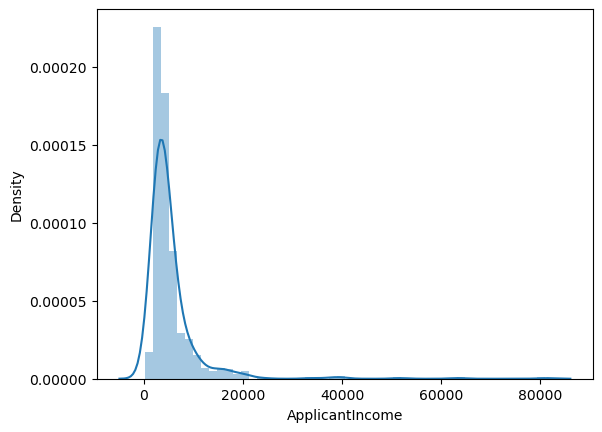

In [264]:
sns.distplot(df['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome'>

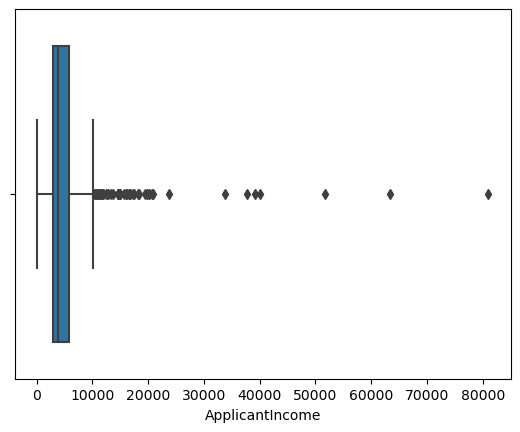

In [265]:
sns.boxplot(x='ApplicantIncome',data=df)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

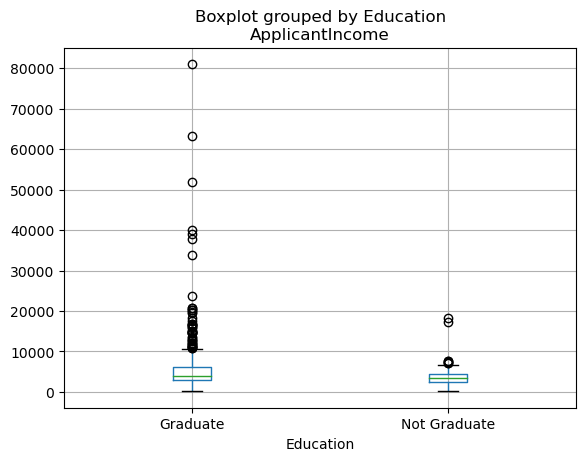

In [266]:
df.boxplot(column='ApplicantIncome',by="Education")

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

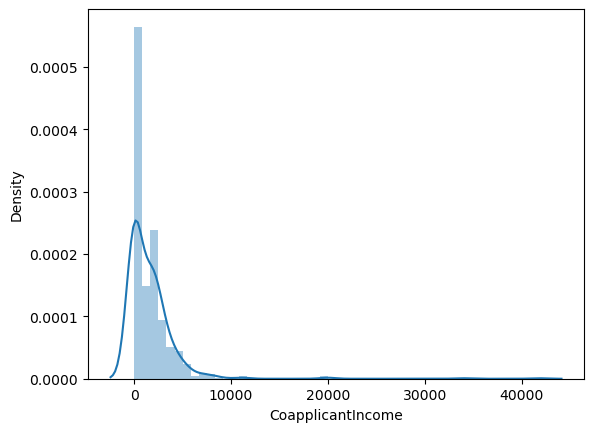

In [267]:
sns.distplot(df['CoapplicantIncome'])

<Axes: title={'center': 'CoapplicantIncome'}, xlabel='Education'>

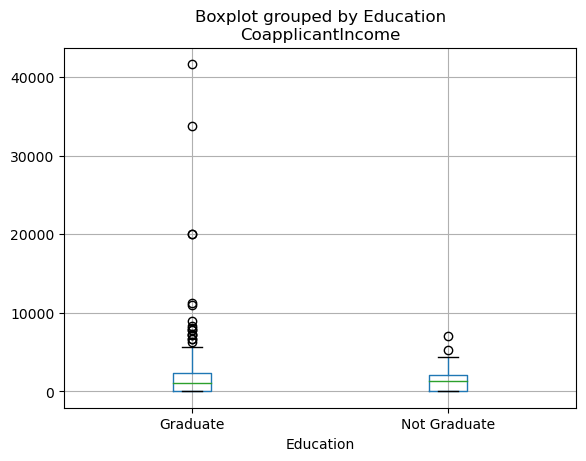

In [268]:
df.boxplot(column='CoapplicantIncome',by="Education")

<Axes: xlabel='LoanAmount', ylabel='Density'>

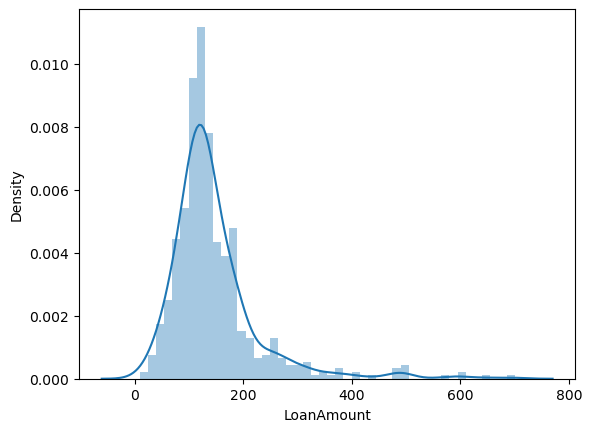

In [269]:
sns.distplot(df['LoanAmount'])

<Axes: >

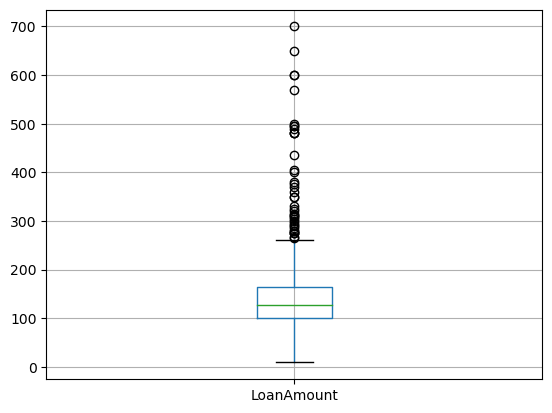

In [270]:
df.boxplot(column='LoanAmount')

<Axes: >

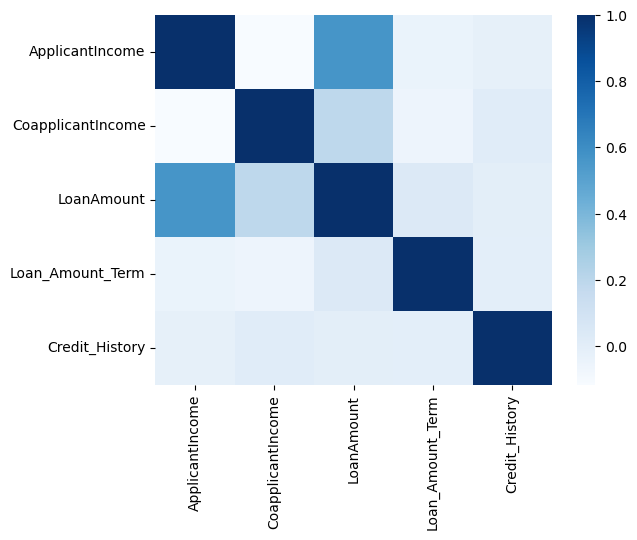

In [271]:
sns.heatmap(df.corr(),cmap='Blues')

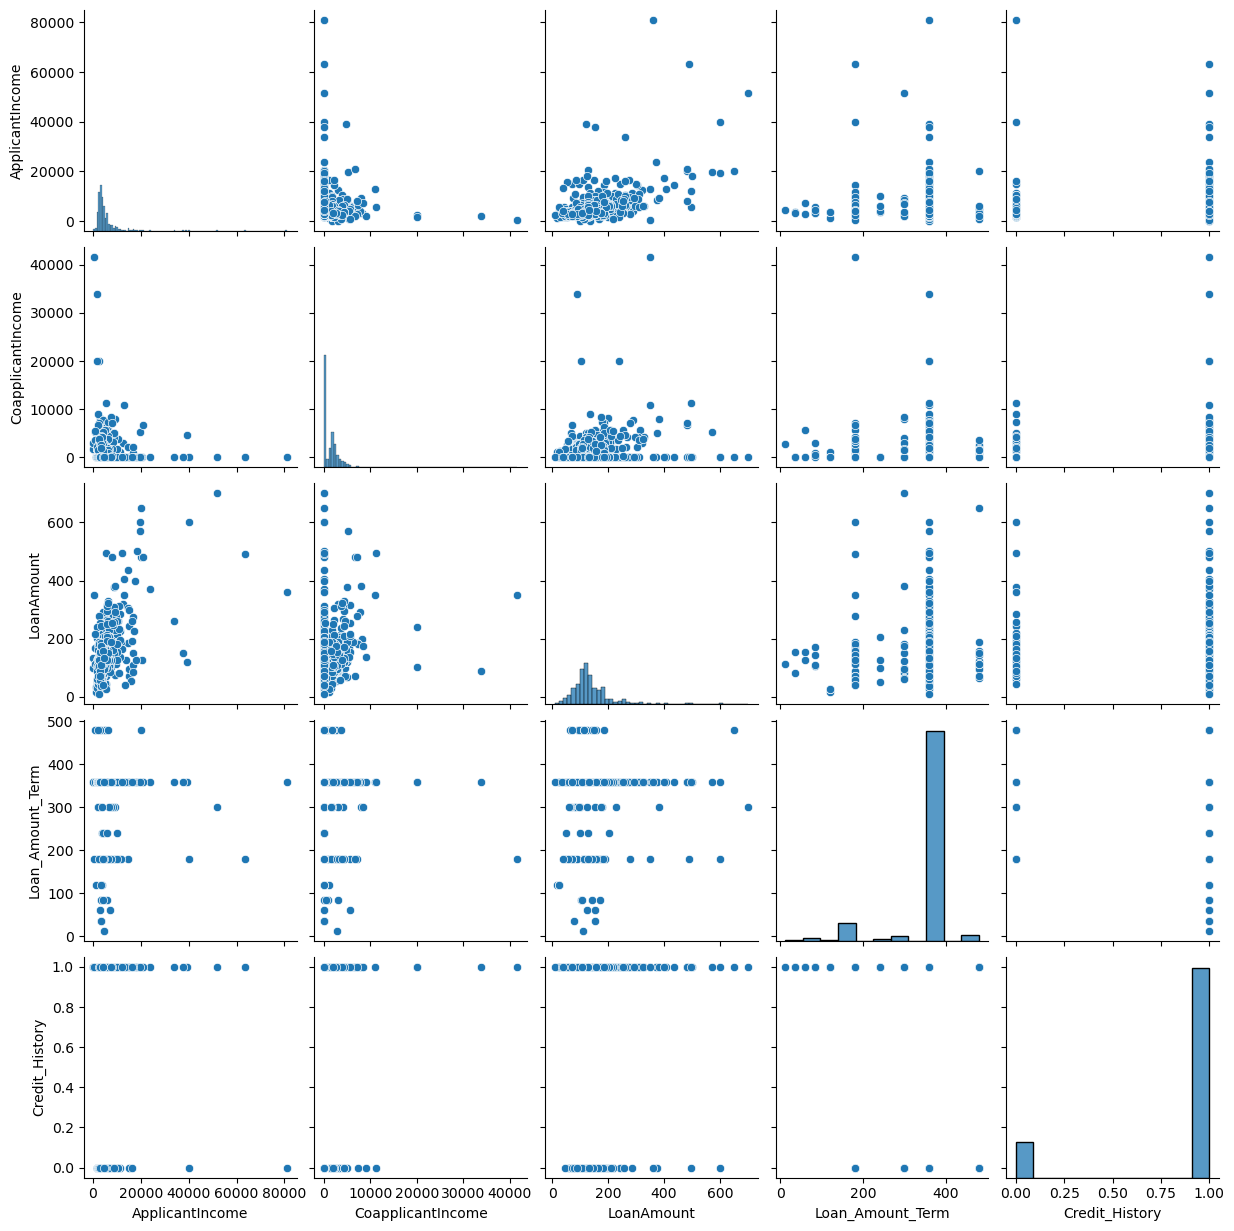

In [272]:
sns.pairplot(df)

In [273]:
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']

In [274]:
df['EMI'].head()

0    0.355556
1    0.355556
2    0.183333
3    0.333333
4    0.391667
Name: EMI, dtype: float64

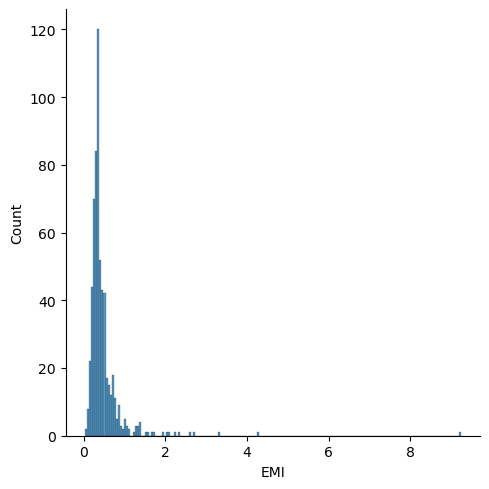

In [275]:
sns.displot(df['EMI'])

<Axes: >

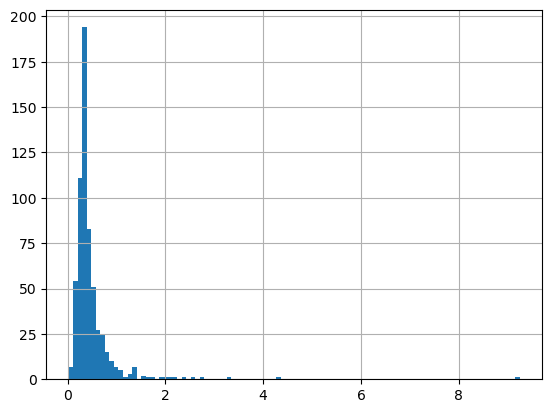

In [276]:
df['EMI'].hist(bins=100)

# Data Modelling

In [277]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'EMI'],
      dtype='object')

In [278]:
train = df
train = df.drop(["Loan_ID","Loan_Status"],1)

In [279]:
X = pd.get_dummies(train)

In [280]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,EMI,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0.355556,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0.355556,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0.183333,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0.333333,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0.391667,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [281]:
test = df2.drop("Loan_ID",1)

In [282]:
test = pd.get_dummies(test)

In [283]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


# Machine Learning

In [284]:
y = df["Loan_Status"]

In [285]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Logistic Regression

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
logic = LogisticRegression()

In [290]:
logic.fit(X_train,y_train)

LogisticRegression()

In [291]:
predictions = logic.predict(X_test)

In [292]:
from sklearn.metrics import classification_report

In [293]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           N       0.94      0.54      0.69        59
           Y       0.82      0.98      0.90       126

    accuracy                           0.84       185
   macro avg       0.88      0.76      0.79       185
weighted avg       0.86      0.84      0.83       185



In [294]:
print((logic.score(X_test,y_test))*100,"%")

84.32432432432432 %


#  Decision Tree

In [295]:
from sklearn.tree import DecisionTreeClassifier

In [296]:
dtree = DecisionTreeClassifier()

In [297]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [298]:
predictions_tree = dtree.predict(X_test)

In [299]:
print(classification_report(y_test,predictions_tree))

              precision    recall  f1-score   support

           N       0.57      0.58      0.57        59
           Y       0.80      0.79      0.80       126

    accuracy                           0.72       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.73      0.72      0.72       185



In [300]:
print((dtree.score(X_test,y_test))*100,"%")

72.43243243243244 %
